# Exploratory data analysis and validation

This notebook explores and validates the preprocessed cholera outbreaks and ECVs sea surface salinity, chlorophyll-a concentration and land surface temperature.

## Setup

In [1]:
# import packages
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Cholera outbreaks

Load cholera outbreaks and explore them briefly.

In [2]:
cholera_outbreaks = gpd.read_file('../../data/outbreaks/monthly_cholera_outbreaks_india_district_2010_2018.shp')
cholera_outbreaks.shape

(547, 6)

In [3]:
cholera_outbreaks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
cholera_outbreaks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   state     547 non-null    object  
 1   district  547 non-null    object  
 2   year      547 non-null    int64   
 3   month     547 non-null    int64   
 4   outbreak  547 non-null    int64   
 5   geometry  547 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 25.8+ KB


In [5]:
cholera_outbreaks.head()

,state,district,year,month,outbreak,geometry
0,himachal pradesh,shimla,2010,7,1,"POLYGON ((77.51051 30.78743, 77.50089 30.79253..."
1,rajasthan,alwar,2010,7,1,"POLYGON ((76.45745 27.08288, 76.44963 27.08627..."
2,assam,dibrugarh,2010,9,1,"POLYGON ((95.37698 27.10218, 95.37267 27.10167..."
3,karnataka,belgaum,2010,9,1,"POLYGON ((74.75089 15.49199, 74.74472 15.48939..."
4,gujarat,bharuch,2010,9,1,"MULTIPOLYGON (((72.67597 21.44681, 72.67597 21..."


In [6]:
# number of states
cholera_outbreaks['state'].nunique()

25

In [7]:
# number of districts
cholera_outbreaks['district'].nunique()

182

In [8]:
# number of cholera outbreaks
cholera_outbreaks['outbreak'].sum()

547

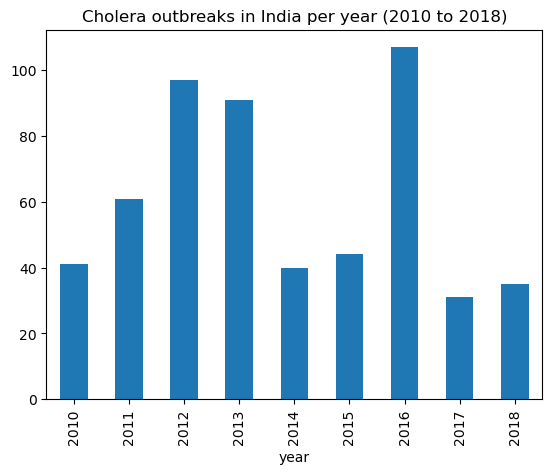

In [9]:
# cholera outbreaks per year
cholera_outbreaks[['year', 'outbreak']].groupby('year').sum().plot.bar(title='Cholera outbreaks in India per year (2010 to 2018)', legend=0)
plt.show()

### Check state-district relationship

In [10]:
cholera_outbreaks[['state', 'district']].shape

(547, 2)

In [11]:
cholera_outbreaks[['state', 'district']].drop_duplicates().shape

(182, 2)

In [12]:
# districts per state
districts_per_state = cholera_outbreaks[['state', 'district']].groupby('state').agg('nunique').reset_index()
districts_per_state

,state,district
0,andhra pradesh,2
1,assam,13
2,bihar,2
3,chandigarh,1
4,chhattisgarh,6
5,dadra and nagar haveli,1
6,goa,1
7,gujarat,16
8,haryana,8
9,himachal pradesh,1


In [13]:
# states per district
states_per_district = cholera_outbreaks[['state', 'district']].groupby('district').agg('nunique').reset_index()
states_per_district

,district,state
0,ahmadabad,1
1,akola,1
2,alwar,1
3,ambala,1
4,amravati,1
...,...,...
177,wayanad,1
178,west,1
179,west nimar,1
180,yamunanagar,1


Are there any districts with more than one state?

In [14]:
states_per_district[states_per_district['state'] != 1]

,district,state


### Validate cholera outbreaks

The number of cholera outbreaks per state for 2011 to 2015 is available at the [IDSP](https://www.idsp.nic.in/index1.php?lang=1&level=1&sublinkid=5803&lid=3751). The following table has been created from these reports.

In [15]:
validation_data = pd.read_csv('../../data/outbreaks/cholera_outbreaks_india_validation_2011_2015.csv')
validation_data.shape

(37, 6)

In [16]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   37 non-null     object
 1   2011    37 non-null     int64 
 2   2012    37 non-null     int64 
 3   2013    37 non-null     int64 
 4   2014    37 non-null     int64 
 5   2015    37 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.9+ KB


In [17]:
validation_data.head()

,State,2011,2012,2013,2014,2015
0,Andaman & Nicobar,0,0,0,0,0
1,Andhra Pradesh,0,1,2,0,1
2,Arunachal Pradesh,0,0,0,0,0
3,Assam,5,8,5,1,0
4,Bihar,0,0,0,2,0


In [18]:
validation_data.tail(1)

,State,2011,2012,2013,2014,2015
36,Total,58,94,96,38,45


#### Total

In [19]:
cholera_outbreaks_total_true = validation_data.tail(1).T.iloc[1: , :].reset_index()
cholera_outbreaks_total_true.columns = ['year', 'cholera_outbreaks_true']
cholera_outbreaks_total_true

,year,cholera_outbreaks_true
0,2011,58
1,2012,94
2,2013,96
3,2014,38
4,2015,45


In [20]:
cholera_outbreaks_total_extracted = cholera_outbreaks.loc[(cholera_outbreaks['year'] >= 2011) & (cholera_outbreaks['year'] <= 2015)][['year', 'outbreak']].groupby('year').sum().reset_index()
cholera_outbreaks_total_extracted = cholera_outbreaks_total_extracted.rename(columns={'outbreak': 'cholera_outbreaks_extracted'})
cholera_outbreaks_total_extracted

,year,cholera_outbreaks_extracted
0,2011,61
1,2012,97
2,2013,91
3,2014,40
4,2015,44


In [21]:
cholera_outbreaks_total_all = pd.concat([cholera_outbreaks_total_true, cholera_outbreaks_total_extracted.drop('year', axis=1)], axis=1)
cholera_outbreaks_total_all['delta_absolute'] = cholera_outbreaks_total_all['cholera_outbreaks_true'] - cholera_outbreaks_total_all['cholera_outbreaks_extracted']
cholera_outbreaks_total_all['delta_relative'] = cholera_outbreaks_total_all['delta_absolute'] / cholera_outbreaks_total_all['cholera_outbreaks_true']
cholera_outbreaks_total_all

,year,cholera_outbreaks_true,cholera_outbreaks_extracted,delta_absolute,delta_relative
0,2011,58,61,-3,-0.051724
1,2012,94,97,-3,-0.031915
2,2013,96,91,5,0.052083
3,2014,38,40,-2,-0.052632
4,2015,45,44,1,0.022222


In [22]:
round(cholera_outbreaks_total_all['delta_relative'].abs().mean(), 2)

0.04

#### State-level

In [23]:
cholera_outbreaks_state_true = pd.melt(validation_data.head(-1), id_vars='State', value_vars=['2011', '2012', '2013', '2014', '2015'])
cholera_outbreaks_state_true.columns = ['state', 'year', 'cholera_outbreaks_true']
cholera_outbreaks_state_true['state'] = cholera_outbreaks_state_true['state'].str.lower()
cholera_outbreaks_state_true['state'] = cholera_outbreaks_state_true['state'].str.strip()
cholera_outbreaks_state_true['state'] = cholera_outbreaks_state_true['state'].str.replace('&', 'and')
cholera_outbreaks_state_true.loc[cholera_outbreaks_state_true['state'] == 'delhi', 'state'] = 'nct of delhi'
cholera_outbreaks_state_true

,state,year,cholera_outbreaks_true
0,andaman and nicobar,2011,0
1,andhra pradesh,2011,0
2,arunachal pradesh,2011,0
3,assam,2011,5
4,bihar,2011,0
...,...,...,...
175,telangana,2015,2
176,tripura,2015,0
177,uttar pradesh,2015,0
178,uttarakhand,2015,0


In [24]:
cholera_outbreaks_state_true['state'].nunique()

36

In [25]:
cholera_outbreaks_state_extracted = cholera_outbreaks.loc[(cholera_outbreaks['year'] >= 2011) & (cholera_outbreaks['year'] <= 2015)][['state', 'year', 'outbreak']].groupby(['state', 'year']).sum().reset_index()
cholera_outbreaks_state_extracted.columns = ['state', 'year', 'cholera_outbreaks_extracted']
cholera_outbreaks_state_extracted['year'] = cholera_outbreaks_state_extracted['year'].astype(str)
cholera_outbreaks_state_extracted

,state,year,cholera_outbreaks_extracted
0,andhra pradesh,2012,1
1,andhra pradesh,2015,1
2,assam,2011,4
3,assam,2012,8
4,assam,2013,5
...,...,...,...
63,west bengal,2011,10
64,west bengal,2012,15
65,west bengal,2013,26
66,west bengal,2014,11


In [26]:
cholera_outbreaks_state_extracted['state'].nunique()

23

In [27]:
cholera_outbreaks_state_all = pd.merge(cholera_outbreaks_state_true, cholera_outbreaks_state_extracted, how='left', on=['state', 'year'])
cholera_outbreaks_state_all = cholera_outbreaks_state_all.fillna(0)
cholera_outbreaks_state_all['delta_absolute'] = cholera_outbreaks_state_all['cholera_outbreaks_true'] - cholera_outbreaks_state_all['cholera_outbreaks_extracted']
cholera_outbreaks_state_all['delta_relative'] = cholera_outbreaks_state_all['delta_absolute'] / cholera_outbreaks_state_all['cholera_outbreaks_true']
cholera_outbreaks_state_all = cholera_outbreaks_state_all.fillna(0)
cholera_outbreaks_state_all

,state,year,cholera_outbreaks_true,cholera_outbreaks_extracted,delta_absolute,delta_relative
0,andaman and nicobar,2011,0,0.0,0.0,0.0
1,andhra pradesh,2011,0,0.0,0.0,0.0
2,arunachal pradesh,2011,0,0.0,0.0,0.0
3,assam,2011,5,4.0,1.0,0.2
4,bihar,2011,0,0.0,0.0,0.0
...,...,...,...,...,...,...
175,telangana,2015,2,2.0,0.0,0.0
176,tripura,2015,0,0.0,0.0,0.0
177,uttar pradesh,2015,0,0.0,0.0,0.0
178,uttarakhand,2015,0,0.0,0.0,0.0


In [28]:
# true == extracted
cholera_outbreaks_state_all[cholera_outbreaks_state_all['cholera_outbreaks_true'] == cholera_outbreaks_state_all['cholera_outbreaks_extracted']].groupby('year').size()

year
2011    30
2012    33
2013    28
2014    33
2015    34
dtype: int64

In [29]:
# true != extracted
cholera_outbreaks_state_all[cholera_outbreaks_state_all['cholera_outbreaks_true'] != cholera_outbreaks_state_all['cholera_outbreaks_extracted']].groupby('year').size()

year
2011    6
2012    3
2013    8
2014    3
2015    2
dtype: int64

Unfortunately, not all cholera outbreaks seem to have been correctly identified for 2011 to 2015. Most likely not all cholera outbreaks have been correctly identified for 2010 and 2016 to 2018 as well.

### Create static map

First, we need to aggregate the cholera outbreaks on state and district level.

In [30]:
# aggregate cholera outbreaks by state and district
map_data = cholera_outbreaks[['state', 'district', 'outbreak']].groupby(['state', 'district']).sum().reset_index()
map_data = pd.merge(cholera_outbreaks[['state', 'district', 'geometry']].drop_duplicates(), map_data, how='inner', on=['state', 'district'])
map_data

,state,district,geometry,outbreak
0,himachal pradesh,shimla,"POLYGON ((77.51051 30.78743, 77.50089 30.79253...",1
1,rajasthan,alwar,"POLYGON ((76.45745 27.08288, 76.44963 27.08627...",4
2,assam,dibrugarh,"POLYGON ((95.37698 27.10218, 95.37267 27.10167...",6
3,karnataka,belgaum,"POLYGON ((74.75089 15.49199, 74.74472 15.48939...",8
4,gujarat,bharuch,"MULTIPOLYGON (((72.67597 21.44681, 72.67597 21...",1
...,...,...,...,...
177,west bengal,barddhaman,"POLYGON ((87.53456 23.60592, 87.54048 23.60416...",1
178,karnataka,chikmagalur,"POLYGON ((75.72794 13.17608, 75.73129 13.15889...",1
179,bihar,purba champaran,"POLYGON ((85.18842 26.82121, 85.17923 26.81489...",1
180,gujarat,chhota udaipur,"POLYGON ((73.51402 21.96360, 73.51527 21.97757...",1


Then we need to get the geometries of states and districts which are available at the [Database of Global Administrative Areas](https://www.gadm.org/index.html) and have already been downloaded during preprocessing the cholera outbreaks.

In [31]:
india = gpd.read_file('../../data/outbreaks/gadm36_IND_shp/gadm36_IND_2.shp')
india.shape

(666, 14)

In [32]:
india.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
india.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_0      666 non-null    object  
 1   NAME_0     666 non-null    object  
 2   GID_1      666 non-null    object  
 3   NAME_1     666 non-null    object  
 4   NL_NAME_1  0 non-null      float64 
 5   GID_2      666 non-null    object  
 6   NAME_2     666 non-null    object  
 7   VARNAME_2  190 non-null    object  
 8   NL_NAME_2  0 non-null      float64 
 9   TYPE_2     666 non-null    object  
 10  ENGTYPE_2  666 non-null    object  
 11  CC_2       0 non-null      float64 
 12  HASC_2     626 non-null    object  
 13  geometry   666 non-null    geometry
dtypes: float64(3), geometry(1), object(10)
memory usage: 73.0+ KB


In [34]:
india.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,NaN,IND.1.1_1,Nicobar Islands,NaN,NaN,District,District,NaN,IN.AN.NI,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.1_1,Andaman and Nicobar,NaN,IND.1.2_1,North and Middle Andaman,NaN,NaN,District,District,NaN,IN.AN.NM,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,IND,India,IND.1_1,Andaman and Nicobar,NaN,IND.1.3_1,South Andaman,NaN,NaN,District,District,NaN,IN.AN.SA,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,IND,India,IND.2_1,Andhra Pradesh,NaN,IND.2.1_1,Anantapur,"Anantpur, Ananthapur",NaN,District,District,NaN,IN.AD.AN,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,IND,India,IND.2_1,Andhra Pradesh,NaN,IND.2.2_1,Chittoor,Chitoor|Chittor,NaN,District,District,NaN,IN.AD.CH,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."


<AxesSubplot: >

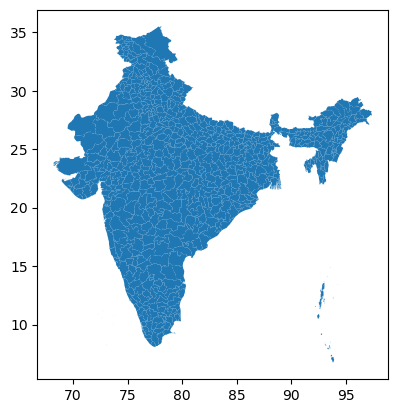

In [35]:
india.plot()

In [36]:
# state polygons
states = india[['NAME_1', 'geometry']].dissolve(by='NAME_1')

<AxesSubplot: >

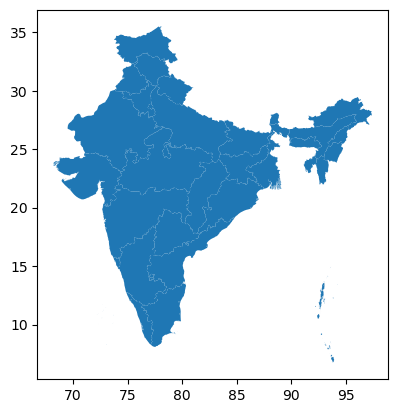

In [37]:
states.plot()

In [38]:
# district polygons
districts = india[['NAME_2', 'geometry']]

<AxesSubplot: >

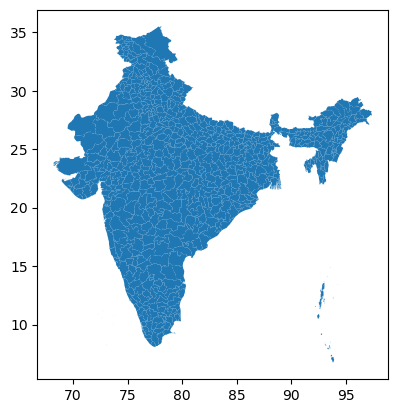

In [39]:
districts.plot()

In [40]:
# check whether crs are identical
india.crs == map_data.crs

True

CPU times: user 10.2 s, sys: 579 ms, total: 10.8 s
Wall time: 9.97 s


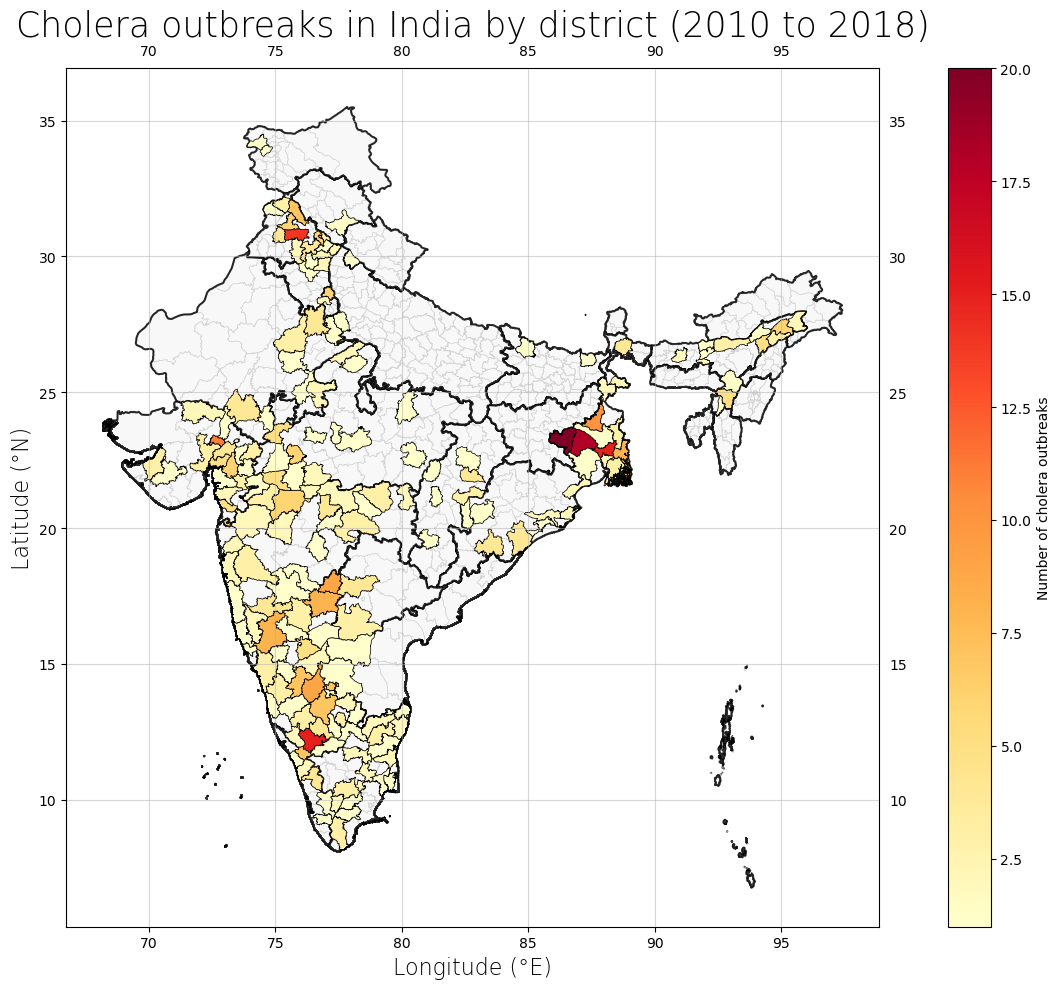

In [41]:
%%time

# create plot and set figure size
fig, ax = plt.subplots(figsize=(14,10))

# plot district boundaries 
districts.plot(ax=ax, facecolor='lightgray', edgecolor='black', linewidth=0.5, alpha=0.7)

# plot state boundaries
states.plot(ax=ax, facecolor='white', edgecolor='black', linewidth=1.5, alpha=0.8)

# plot cholera outbreaks
map_data.plot(ax=ax, column='outbreak', cmap='YlOrRd', edgecolor='black', linewidth=0.5, legend=True, legend_kwds={'label': 'Number of cholera outbreaks'})

# set plot parameters
ax.set_title('Cholera outbreaks in India by district (2010 to 2018)', fontdict={'fontsize': '25', 'fontweight': '3'})
ax.set_xlabel('Longitude (°E)', fontdict={'fontsize': '16', 'fontweight': '3'})
ax.set_ylabel('Latitude (°N)', fontdict={'fontsize': '16', 'fontweight': '3'})
plt.tick_params(labeltop=True, labelright=True)
plt.grid(alpha=0.5)
plt.tight_layout()

# save plot
plt.savefig('../0_images/cholera_outbreaks_india_district_2010_2018.png', dpi=300)

## ECVs

In [42]:
def plot_ecv(df, ecv_short, ecv_long):
    
    # create subplots
    fig, axs = plt.subplots(2, 2, figsize=(8,8))
    
    # set min and max values for x and y axses
    x_min = 60
    x_max = 100
    y_min = 0
    y_max = 40
    
    # set x and y labels
    x_label = 'Longitude (°E)'
    y_label = 'Latitude (°N)'
    
    # set alpha
    alpha = 0.5
    
    # plot data for January
    df[df['month'] == 1].plot(column=ecv_short, legend=True, ax=axs[0, 0])
    axs[0, 0].set_xlim(x_min, x_max)
    axs[0, 0].set_ylim(y_min, y_max)
    axs[0, 0].set_title('January')
    axs[0, 0].set_xlabel(x_label)
    axs[0, 0].set_ylabel(y_label)
    axs[0, 0].grid(alpha=alpha)
    
    # plot data for April
    df[df['month'] == 4].plot(column=ecv_short, legend=True, ax=axs[0, 1])
    axs[0, 1].set_xlim(x_min, x_max)
    axs[0, 1].set_ylim(y_min, y_max)
    axs[0, 1].set_title('April')
    axs[0, 1].set_xlabel(x_label)
    axs[0, 1].set_ylabel(y_label)
    axs[0, 1].grid(alpha=alpha)
    
    # plot data for July
    df[df['month'] == 7].plot(column=ecv_short, legend=True, ax=axs[1, 0])
    axs[1, 0].set_xlim(x_min, x_max)
    axs[1, 0].set_ylim(y_min, y_max)
    axs[1, 0].set_title('July')
    axs[1, 0].set_xlabel(x_label)
    axs[1, 0].set_ylabel(y_label)
    axs[1, 0].grid(alpha=alpha)
    
    # plot data for October
    df[df['month'] == 10].plot(column=ecv_short, legend=True, ax=axs[1, 1])
    axs[1, 1].set_xlim(x_min, x_max)
    axs[1, 1].set_ylim(y_min, y_max)
    axs[1, 1].set_title('October')
    axs[1, 1].set_xlabel(x_label)
    axs[1, 1].set_ylabel(y_label)
    axs[1, 1].grid(alpha=alpha)
    
    # set figure title
    year = df['year'].unique()[0]
    plt.suptitle(f'Mean {ecv_long} {year}', fontsize=16)
    
    plt.tight_layout()
    plt.show()
    
    # save plot
    fig.savefig(f'../0_images/mean_{ecv_short}_{year}.png', dpi=300)

### Sea surface salinity

In [43]:
path = '../../data/sea_surface_salinity/'
ecv_short = 'sss'
year = 2018

In [44]:
%%time

sss = gpd.read_file(os.path.join(path, f'monthly_{ecv_short}_{year}.shp'))
sss.shape

CPU times: user 35.3 s, sys: 278 ms, total: 35.5 s
Wall time: 35.8 s


(165696, 4)

In [45]:
sss.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 165696 entries, 0 to 165695
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   year      165696 non-null  int64   
 1   month     165696 non-null  int64   
 2   sss       165696 non-null  float64 
 3   geometry  165696 non-null  geometry
dtypes: float64(1), geometry(1), int64(2)
memory usage: 5.1 MB


In [46]:
sss.head()

,year,month,sss,geometry
0,2018,1,35.536095,POINT (60.04323 0.09808)
1,2018,2,35.466061,POINT (60.04323 0.09808)
2,2018,3,35.574512,POINT (60.04323 0.09808)
3,2018,4,35.445744,POINT (60.04323 0.09808)
4,2018,5,35.218952,POINT (60.04323 0.09808)


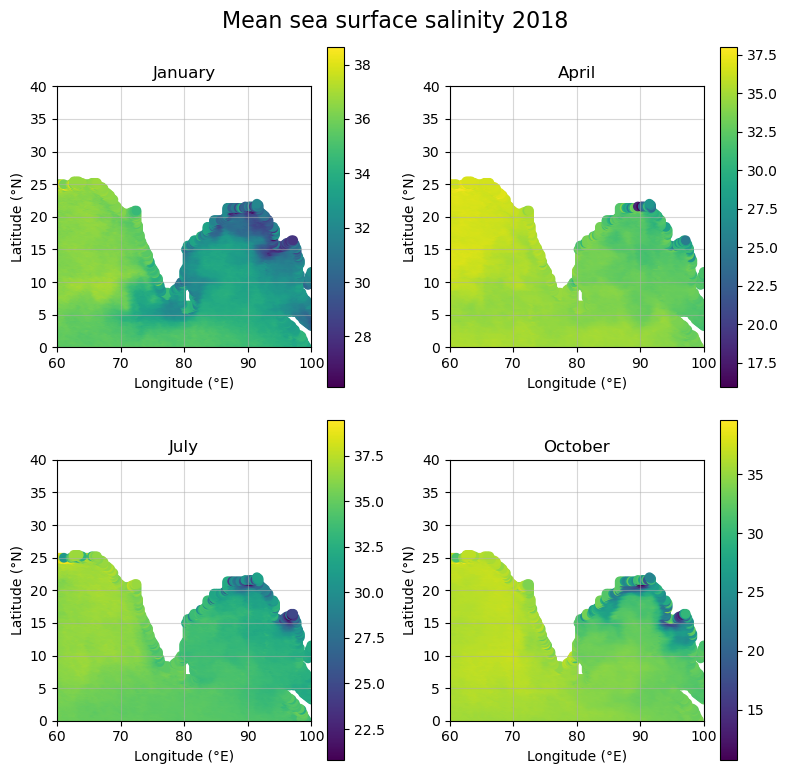

CPU times: user 16 s, sys: 462 ms, total: 16.4 s
Wall time: 15.8 s


In [47]:
%%time

plot_ecv(sss, 'sss', 'sea surface salinity')

### Chlorophyll-a concentration

In [48]:
path = '../../data/chlorophyll_a_concentration/'
ecv_short = 'chlora'
year = 2018

In [49]:
%%time

chlora = gpd.read_file(os.path.join(path, f'monthly_{ecv_short}_{year}.shp'))
chlora.shape

CPU times: user 15min 50s, sys: 5.96 s, total: 15min 56s
Wall time: 15min 58s


(4782730, 4)

In [50]:
chlora.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4782730 entries, 0 to 4782729
Data columns (total 4 columns):
 #   Column    Dtype   
---  ------    -----   
 0   year      int64   
 1   month     int64   
 2   chlora    float64 
 3   geometry  geometry
dtypes: float64(1), geometry(1), int64(2)
memory usage: 146.0 MB


In [51]:
chlora.head()

,year,month,chlora,geometry
0,2018,1,-1.571544,POINT (60.02083 0.02083)
1,2018,2,-1.876267,POINT (60.02083 0.02083)
2,2018,3,-1.264938,POINT (60.02083 0.02083)
3,2018,4,-2.081722,POINT (60.02083 0.02083)
4,2018,5,-2.214021,POINT (60.02083 0.02083)


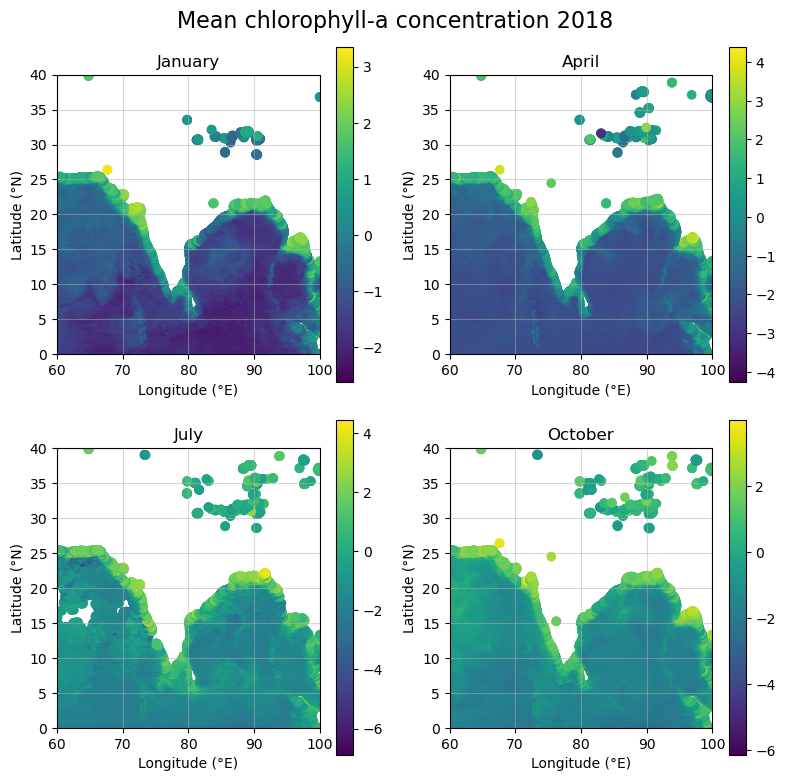

CPU times: user 5min 30s, sys: 5.42 s, total: 5min 36s
Wall time: 5min 29s


In [52]:
%%time

plot_ecv(chlora, 'chlora', 'chlorophyll-a concentration')

### Land surface temperature

In [53]:
path = '../../data/land_surface_temperature'
ecv_short = 'lst'
year = 2018

In [54]:
%%time

lst = gpd.read_file(os.path.join(path, f'monthly_{ecv_short}_{year}.shp'))
lst.shape

CPU times: user 12min 30s, sys: 1.93 s, total: 12min 32s
Wall time: 12min 34s


(3226495, 4)

In [55]:
lst.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3226495 entries, 0 to 3226494
Data columns (total 4 columns):
 #   Column    Dtype   
---  ------    -----   
 0   year      int64   
 1   month     int64   
 2   lst       float64 
 3   geometry  geometry
dtypes: float64(1), geometry(1), int64(2)
memory usage: 98.5 MB


In [56]:
lst.head()

,year,month,lst,geometry
0,2018,4,308.109985,POINT (99.65000 0.05000)
1,2018,6,306.709991,POINT (99.65000 0.05000)
2,2018,7,307.760010,POINT (99.65000 0.05000)
3,2018,8,307.919983,POINT (99.65000 0.05000)
4,2018,9,307.039978,POINT (99.65000 0.05000)


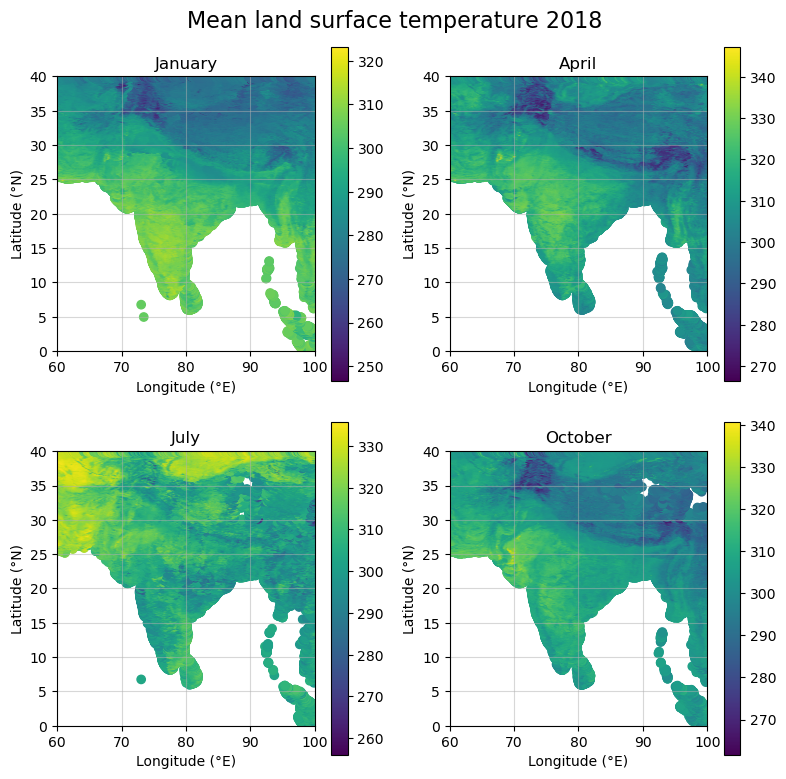

CPU times: user 4min 55s, sys: 1.8 s, total: 4min 57s
Wall time: 4min 56s


In [57]:
%%time

plot_ecv(lst, 'lst', 'land surface temperature')